# AVISOS

+ ### FECHA TAREA 4: 
    - GRUPO 1 (LUNES-MIÉRCOLES) SÁBADO 21 DE SEPTIEMBRE DEL 2019 23:55. 
    - GRUPO 2 (MARTES-VIERNES) VIERNES 20 DE SEPTIEMBRE DEL 2019 23:55

#### ESCRIBIR ECUACIONES Y RESTRICCIONES EN CELDAS DE MARKDOWN Y CONCLUIR CADA EJERCICIO IGUALMENTE EN UNA CELDA DE MARKDOWN

+ ### EXAMEN MÓDULO 1:
     - GRUPO 1 (LUNES-MIÉRCOLES) CLASE DE REPASO 25 DE SEPTIEMBRE DEL 2019. ENTREGA DEL EXÁMEN 29 DE SEPTIEMBRE 2019 23:55. 
     - GRUPO 2 (MARTES-VIERNES) CLASE DE REPASO 24 DE SEPTIEMBRE DEL 2019. ENTREGA DEL EXÁMEN 28 DE SEPTIEMBRE 2019 23:55. 

# PROYECTO MÓDULO 1

### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Madarme un correo con los nombres de los integrantes ya.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para la siguiente semana, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: 
###     Grupo 1(L-W): 2 de Octubre de 2019 (10 minutos cada equipo).
###     Grupo 2(M-V): 1 de Octubre de 2019 (10 minutos cada equipo).

# Ideas de proyectos:
1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)

 + Planeación de mano de obra.
 + Planeación de producción.
 + Arbitraje usando programación lineal (Financiera) http://www.meiss.com/columbia/en/teaching/1999/fall/B6015/download/lecture05/lec5.pdf
 + Planta de tratamiento de aguas residuales de bajo costo (Ingeniería civil) Numerical Methods for Engineers pg 421
 + Problema de descubrir datos ocultos
 + Optimizar diseño de divisor de voltaje
2. Ajuste de curvas (con base en los datos en https://data.worldbank.org/indicator)

 + Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
 + Por ejemplo, CO2 emissions (kt), Forest area (sq. km), están relacionados con cambio climático. En las emisiones de CO2 parece que en los últimos años la curva tiene tendencia de concavidad hacia abajo, lo que indicaría que las políticas que se estén ejecutando si están teniendo un impacto.
 + Otro ejemplo puede ser Access to electricity (% of population). Se ve que está en constante crecimiento. Se podría estimar cuándo se llegará al 95%.

# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Encontrar \beta_0 y \beta_1 resolviendo el sistema
A = np.array([[1,3],
             [1,2]])

b = np.array([1,0])

#Matriz inversa de A
A1 = np.linalg.inv(A)

#Estas dos líneas son equivalentes
beta = A1.dot(b)
beta = np.dot(A1,b)
beta

array([-2.,  1.])

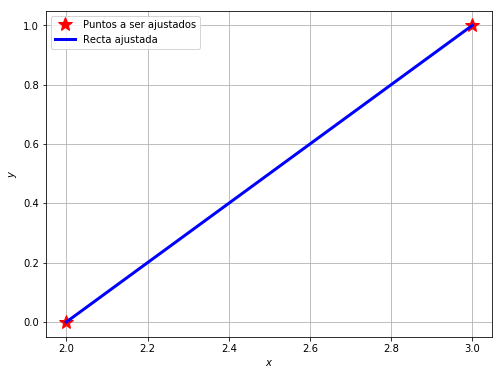

In [3]:
# Graficar la recta encontrada junto con los puntos
#Definir puntos
x = np.array([3,2])
y = np.array([1,0])

y_ajustada = beta[1]*x + beta[0]

#Crear la figura y definir el tamaño
plt.figure(figsize=(8,6))

#Graficar puntos y la recta ajustada
plt.plot(x,y,'r*',ms=15,label='Puntos a ser ajustados')
plt.plot(x,y_ajustada,'b',linewidth=3,label='Recta ajustada')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.grid()
plt.legend(loc='best')
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
# Encontrar \beta_0 y \beta_1 resolviendo el sistema

#Matriz inversa de A

#Estas dos líneas son equivalentes


array([ 1., -2.,  1.])

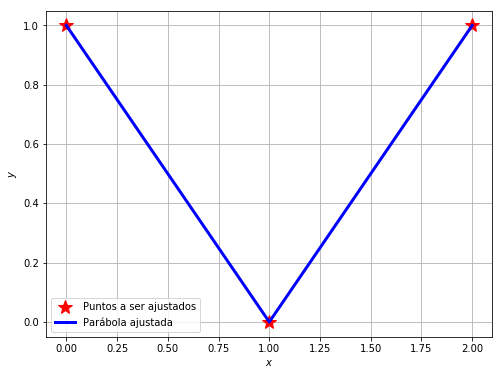

In [5]:
# Graficar la parabola junto con los puntos
# Coordenadas de los puntos dados

#Gráfico

#Agregar gráficas


### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [ ]:
# Crear un conjunto de puntos ruidosos a partir de una recta


In [ ]:
# Graficar


### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿por qué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [ ]:
# Importar el módulo optimize de la librería scipy


In [ ]:
# Función minimize


Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como `{'ineq': g_i, 'eq': h_j}`.

Primero debemos construir la función objetivo y la semilla inicial:

In [ ]:
# Se vuelven a definir los puntos ruidosos


In [ ]:
#Definimos función objetivo (Funcional de costo)


# Definimos el beta inicial


In [ ]:
#Obtener resultado con la función minimize
#obj: Función objetivo
#beta_inicial: Valores iniciales de los parámetros beta
# args: Puntos dados en el problema


In [ ]:
# Mostrar


¿Qué tan bien luce el ajuste?

In [ ]:
# Coeficientes \beta_0 y \beta_1


In [ ]:
#Definir curva ajustada


# Grafica de los puntos y la recta ajustada


Note que la pendiente es aproximadamente $6$ y el intercepto es aproximadamente $4$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [ ]:
# Generamos 100 puntos ruidosos a partir de una senoidal


#Graficamos los puntos


### 2.1. ¿Se ajustará bien una recta?

In [ ]:
# Definir funcion objetivo y semilla


In [ ]:
# Resolver


**Veamos $\beta$ para el ajuste con recta**

In [ ]:
# Mostrar coeficientes


In [ ]:

# Graficar


### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [ ]:
# Definir funcion objetivo y semilla


In [ ]:
# Resolver


**Veamos $\beta$ para el ajuste con parábola**

In [ ]:
# Mostrar coeficientes


In [ ]:
# Graficar recta y parabola ajustadas



### 2.3. Tampoco. Quizá un polinomio cúbico...

In [ ]:
# Definir funcion objetivo y semilla


In [ ]:
# Resolver


**Veamos $\beta$ para el ajuste con cúbica**

In [ ]:
# Mostrar coeficientes


In [ ]:
# Graficar recta, parabola y cubica
# Graficar recta y parabola ajustadas

# Graficar


Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 6...

In [ ]:
# Definimos funcion objetivo y semilla


In [ ]:
# Resolvemos


**De nuevo, veamos $\beta$**

In [ ]:
# Mostrar coeficientes


**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [ ]:
# Grafica de ajustes
# Graficar recta, parabola, cubica y polinomio de grado 6
# Graficar recta y parabola ajustadas

# Graficar


Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [ ]:
# Error cuadratico



En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [ ]:
#Definir función objetivo y solucionar problema


In [ ]:
# Mostrar parámetros beta


In [ ]:
# Graficar
# Grafica de ajustes
# Graficar recta, parabola, cubica y polinomio de grado 6
# Graficar recta y parabola ajustadas

# Graficar


### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [ ]:
#Definir función objetivo y solucionar problema


In [ ]:
# Graficar

# Graficar


## 5. Actividad

1. Ajustar polinomios de grado 1 hasta grado 9 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
3. Para el grado de polinomio elegido, realizar el ajuste con ridge con coeficiente de 0.01.
4. Comparar los beta obtenidos del grado seleccionado.

In [ ]:
def f(x):
    return np.sinc(x)

In [ ]:
x1 = np.linspace(-3, 3)
y1 = f(x1)

plt.figure(figsize=(8,6))
plt.plot(x1, y1, '*b', label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>